# Nueral Networks
Neural Networks are incredibly popular and powerful machine learning models. They often perform well in cases where we have a lot of features as they automatically do feature engineering without requiring domain knowledge to restructure the features.

# Biological Nueral Network
A more accurate term for Neural Networks is **Artificial Neural Networks (ANN)**. They were inspired by how biological neural networks work in human brains.

A brain’s neural network is made up of around 86 billion neurons. The neurons are connected by what are called **synapses**. There are about 100 trillion synapses in the human brain. The neurons send signals to each other through the synapses.

# What is a Nueron
An artificial neuron (often called a node) is modeled after a biological neuron. It is a simple object that can take input, do some calculations with the input, and produce an output.

We visually represent neurons as follows. x1 and x2 are the inputs. Inside the neuron, some computation is done based on x1 and x2 to produce the output y1.

Neurons can take any number of inputs and can also produce any number of outputs.

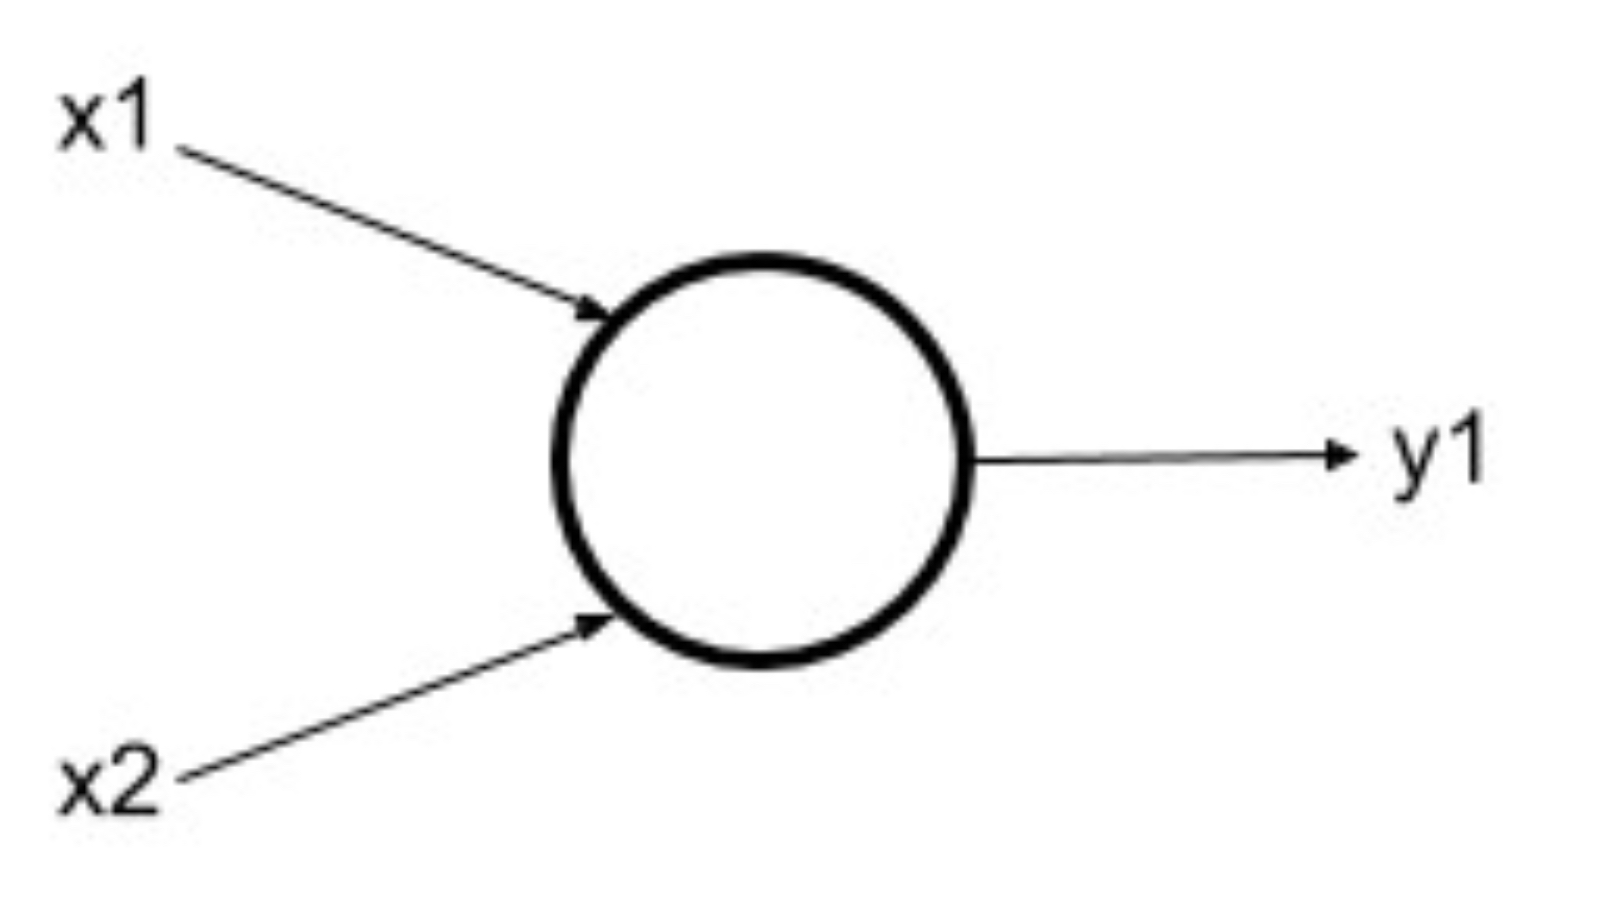

# Nueron Computations
Inside the neuron, to do the computation to produce the output, we first put the inputs into the following equation (just like in logistic regression).
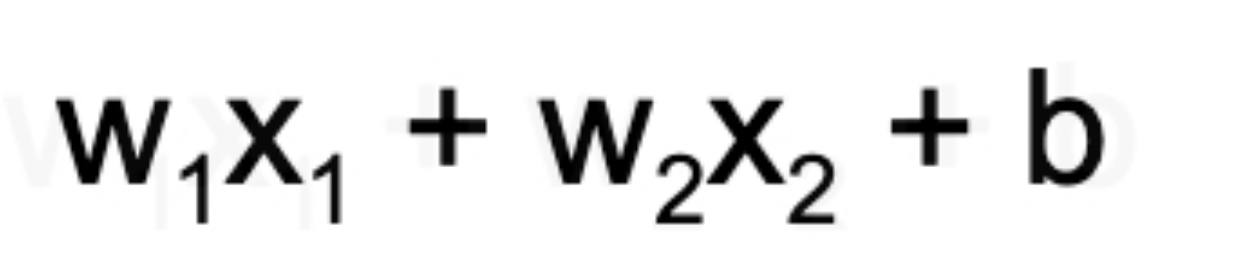

Recall that x1 and x2 are the inputs. In logistic regression, we referred to the values w1, w2, and b as the coefficients. In neural networks, we refer to w1 and w2 as the **weights**, and b as the **bias**.

We plug this value into what is called an **activation function**. The above equation can have a result of any real number. The activation function condenses it into a fixed range (often between 0 and 1).

A commonly used activation function is the **sigmoid** function, the same function we used in logistic regression. Recall that this function produces a value between 0 and 1. It is defined as follows.

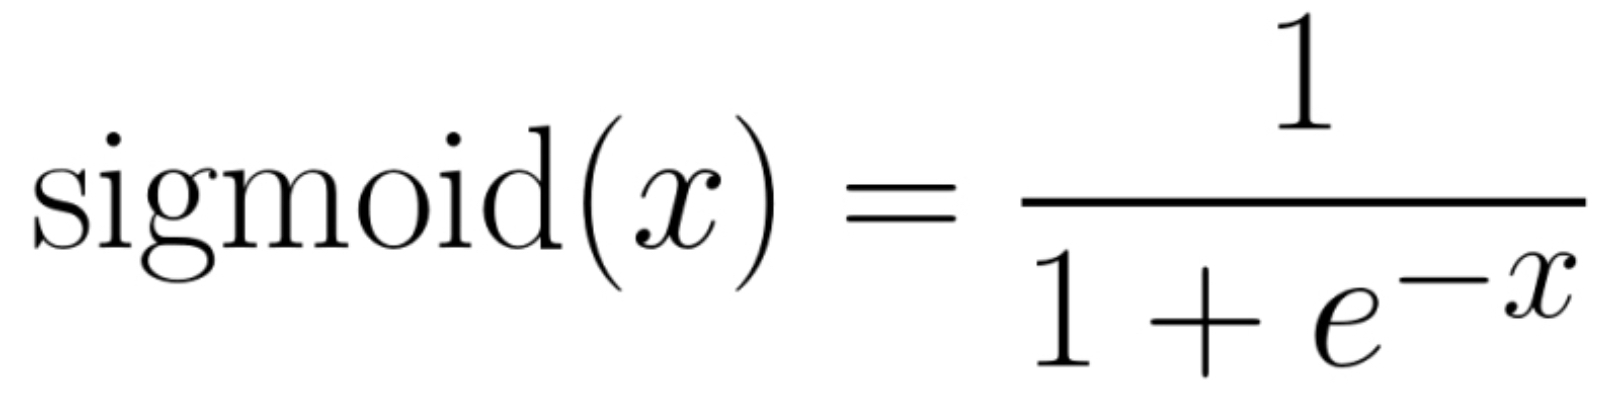

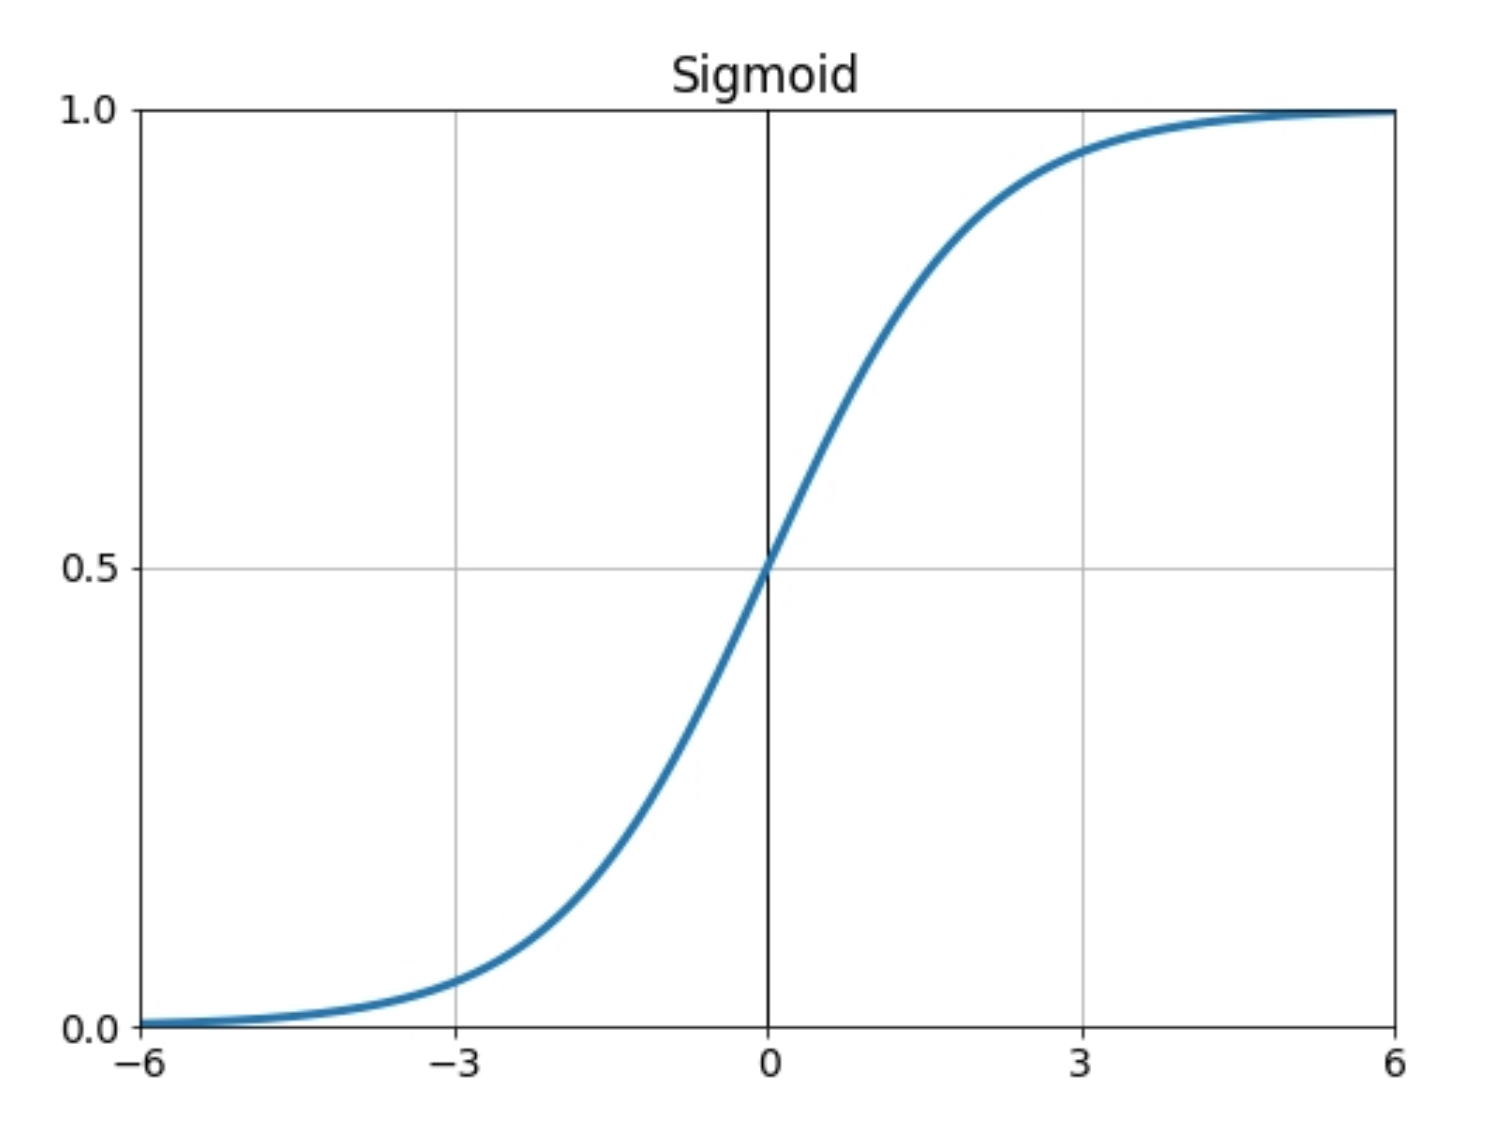

To get the output from the inputs we do the following computation. The weights, w1 and w2, and the bias, b, control what the neuron does. We call these values (w1, w2, b) the **parameters**. The function f is the activation function (in this case the sigmoid function). The value y is the neuron’s output.

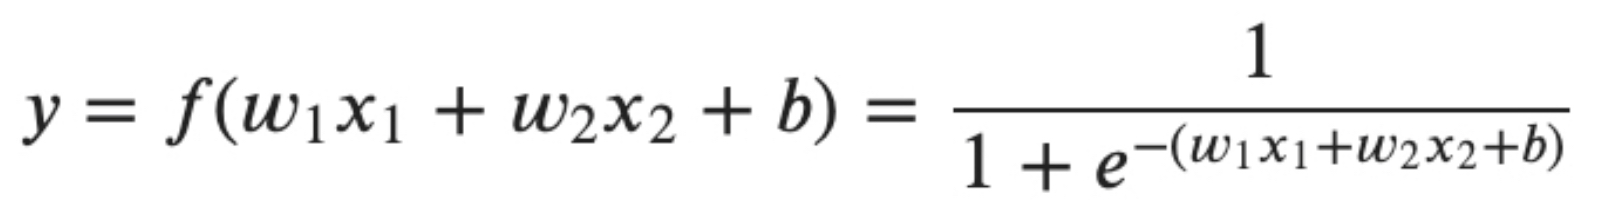

# Activation functions
There are three commonly used activation functions: sigmoid (from the previous part), tanh, and ReLU.

**Tanh** has a similar form to sigmoid, though ranges from -1 to 1 instead of 0 to 1. Tanh is the hyperbolic tan function and is defined as follows:

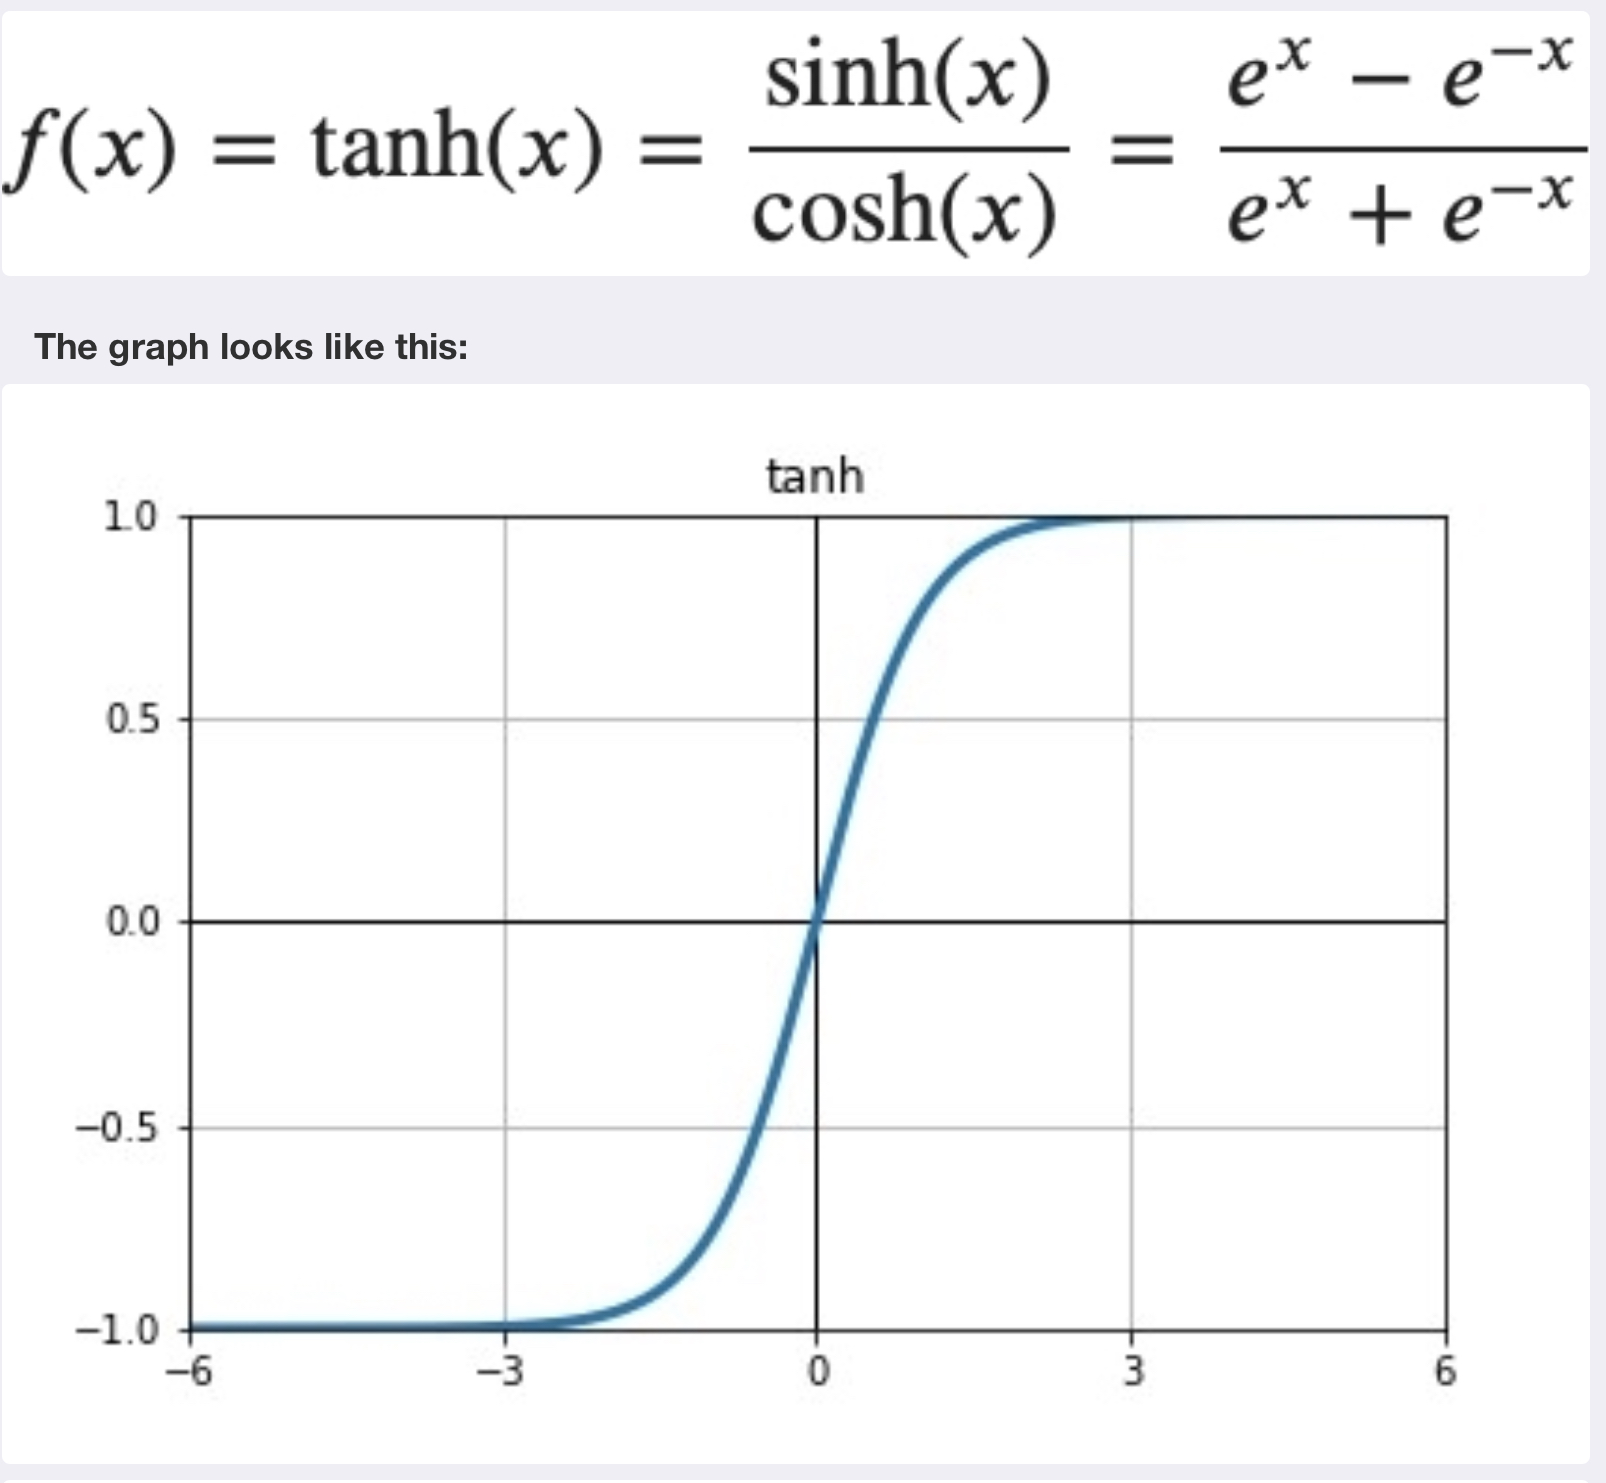

**ReLU** stands for Rectified Linear Unit. It is the identity function for positive numbers and sends negative numbers to 0.

Here is the equation and graph.
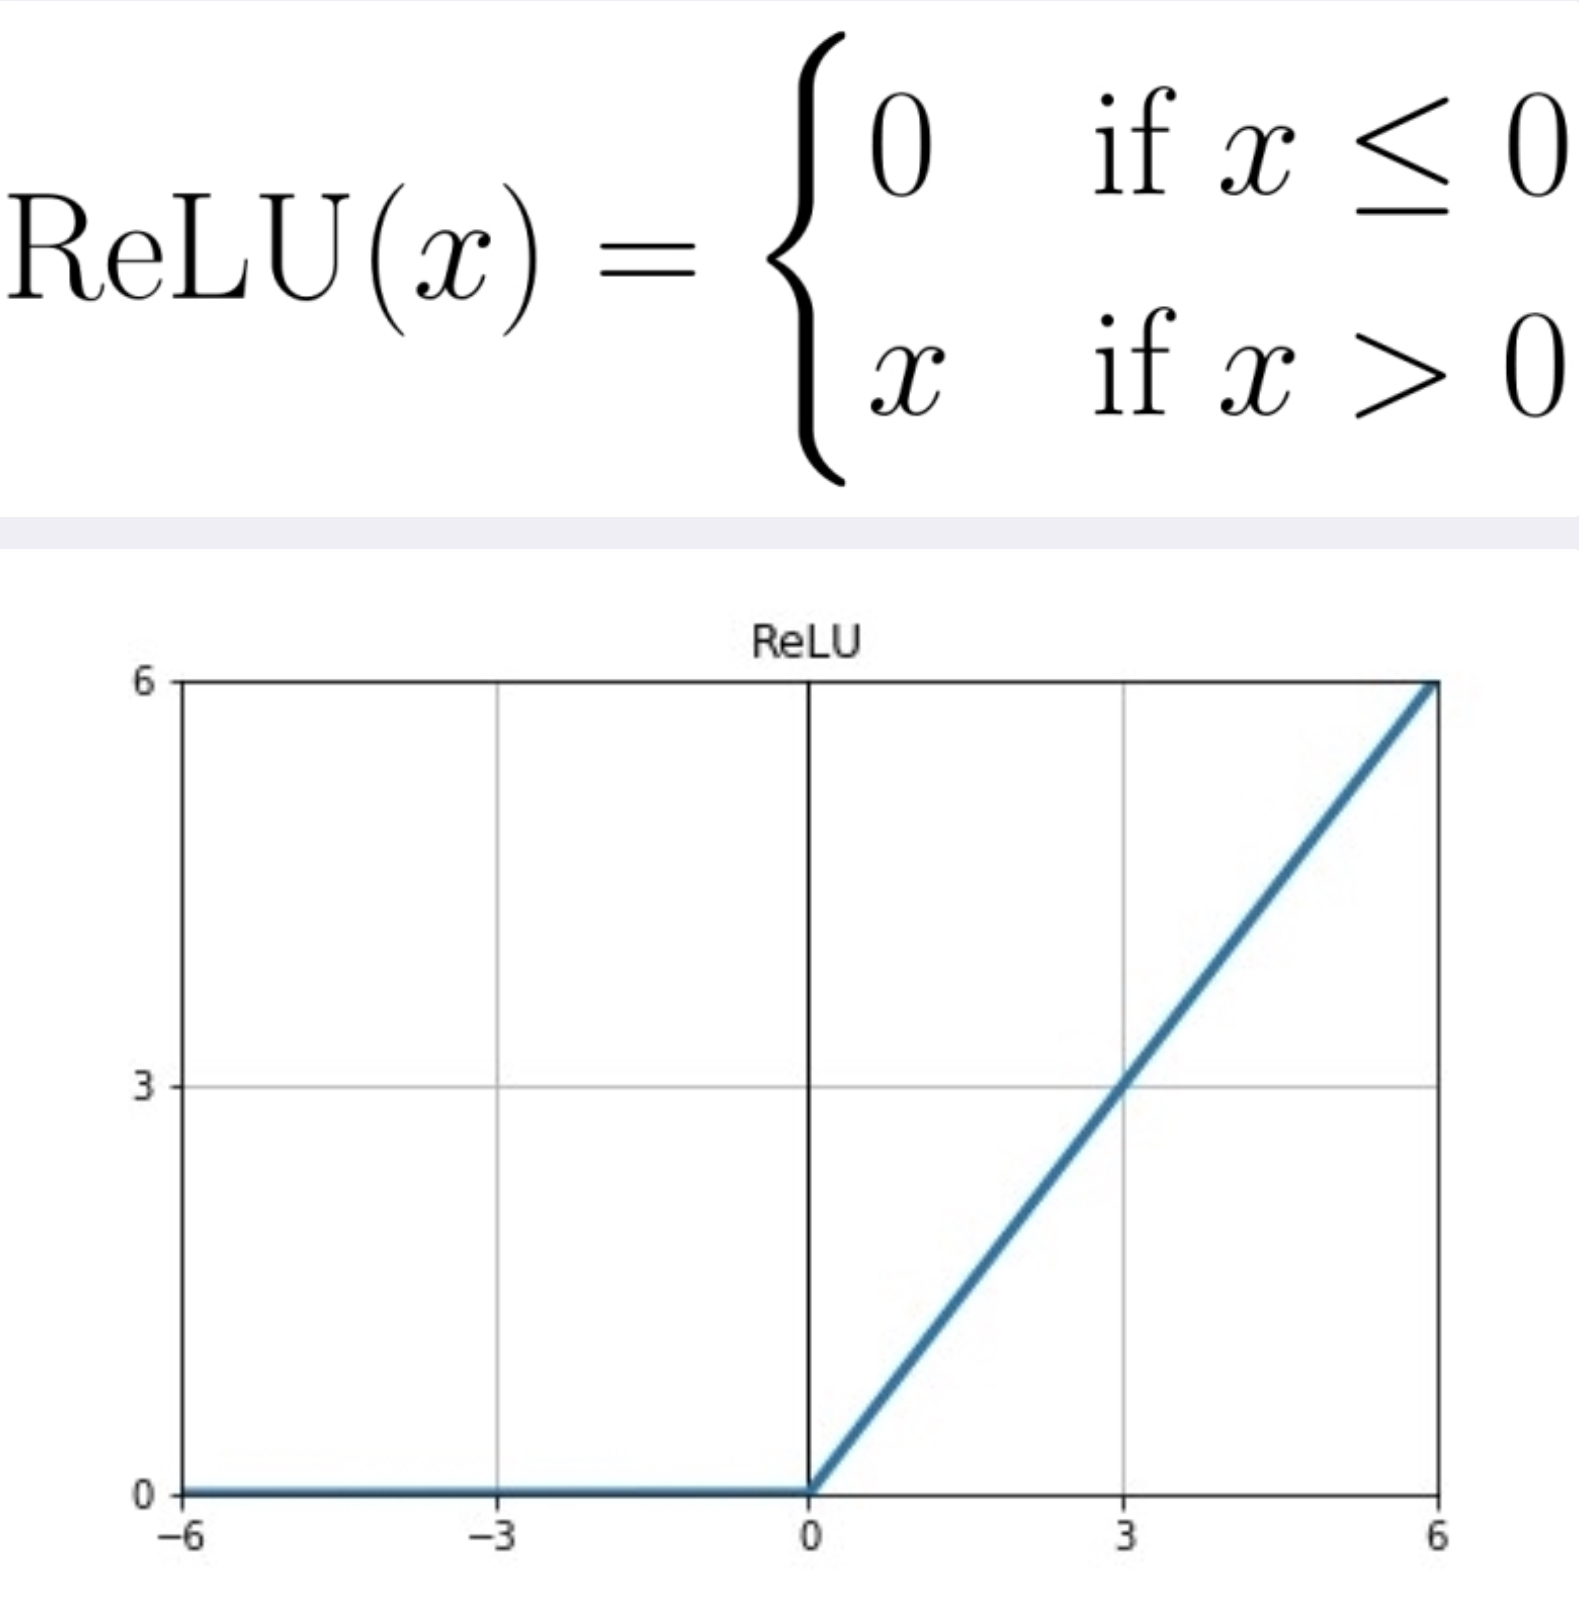


# Multi-Layer Perception
To create a neural network we combine neurons together so that the outputs of some neurons are inputs of other neurons. We will be working with feed forward neural networks which means that the neurons only send signals in one direction. In particular, we will be working with what is called a Multi-Layer Perceptron (MLP). The neural network has multiple layers which we see depicted below.
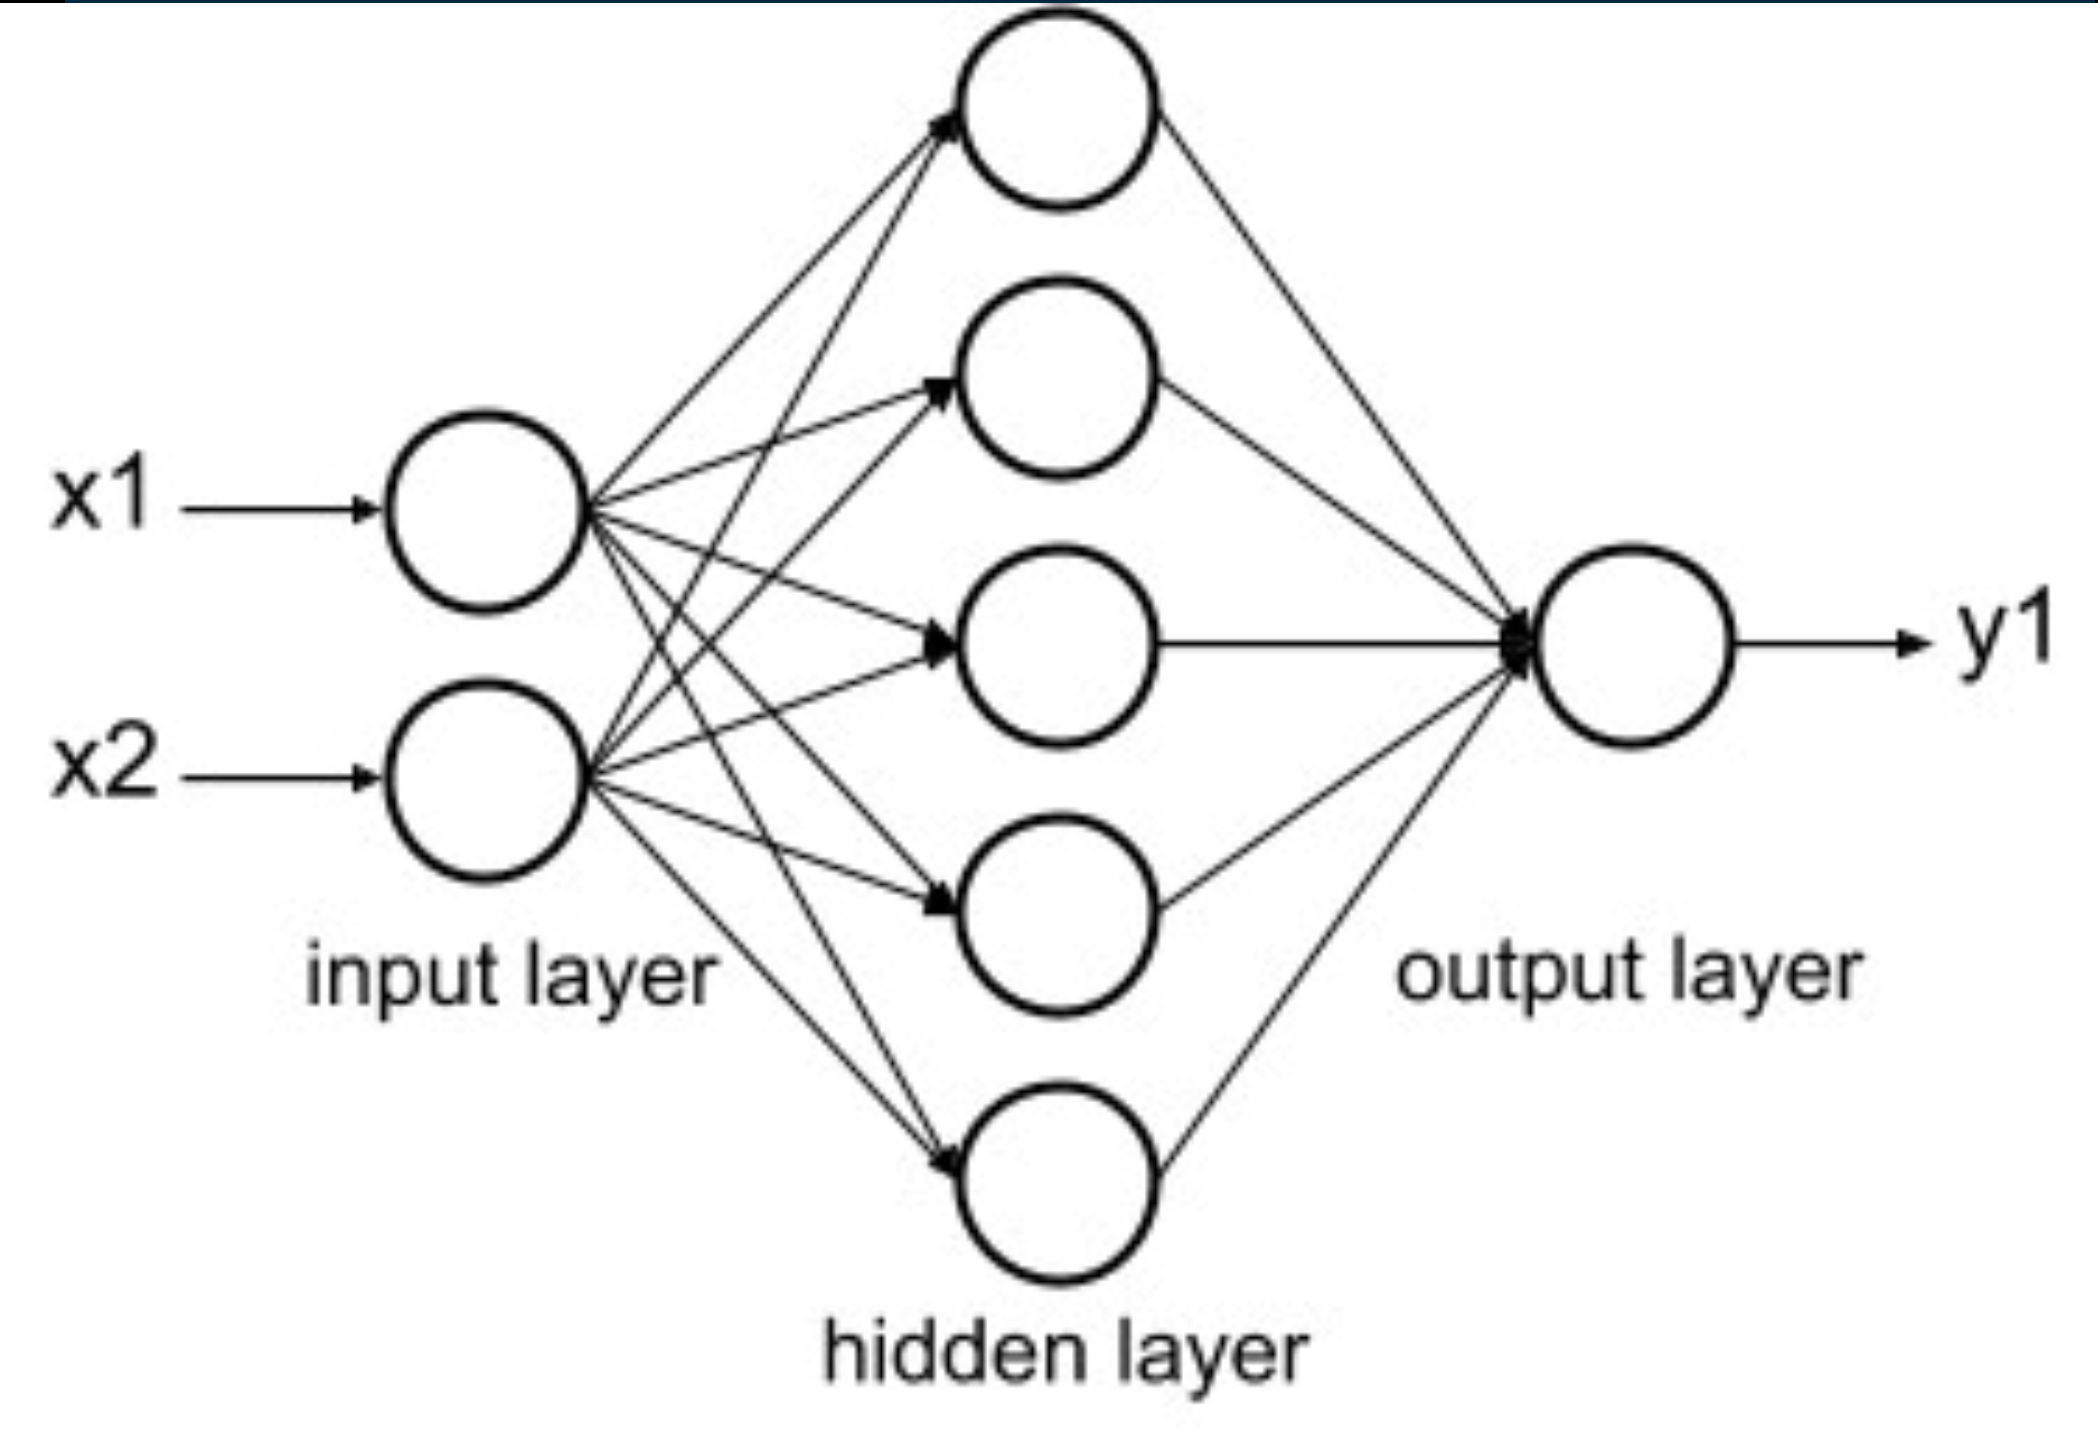

A multi-layer perceptron will always have one input layer, with a neuron (or node) for each input. In the neural network above, there are two inputs and thus two input nodes. It will have one output layer, with a node for each output. Above there is 1 output node for a single output value. It can have any number of hidden layers and each hidden layer can have any number of nodes. Above there is one hidden layer with 5 nodes.

The nodes in the input layer take a single input value and pass it forward. The nodes in the hidden layers as well as the output layer can take multiple inputs but they always produce a single output. Sometimes the nodes need to pass their output to multiple nodes. In the example above, the nodes in the input layer pass their output to each of the five nodes in the hidden layer.

A single-layer perceptron is a neural network without any hidden layers. These are rarely used. Most neural networks are multi-layer perceptrons, generally with one or two hidden layers.

To change how the neural network performs, we can change the weights and bias values.

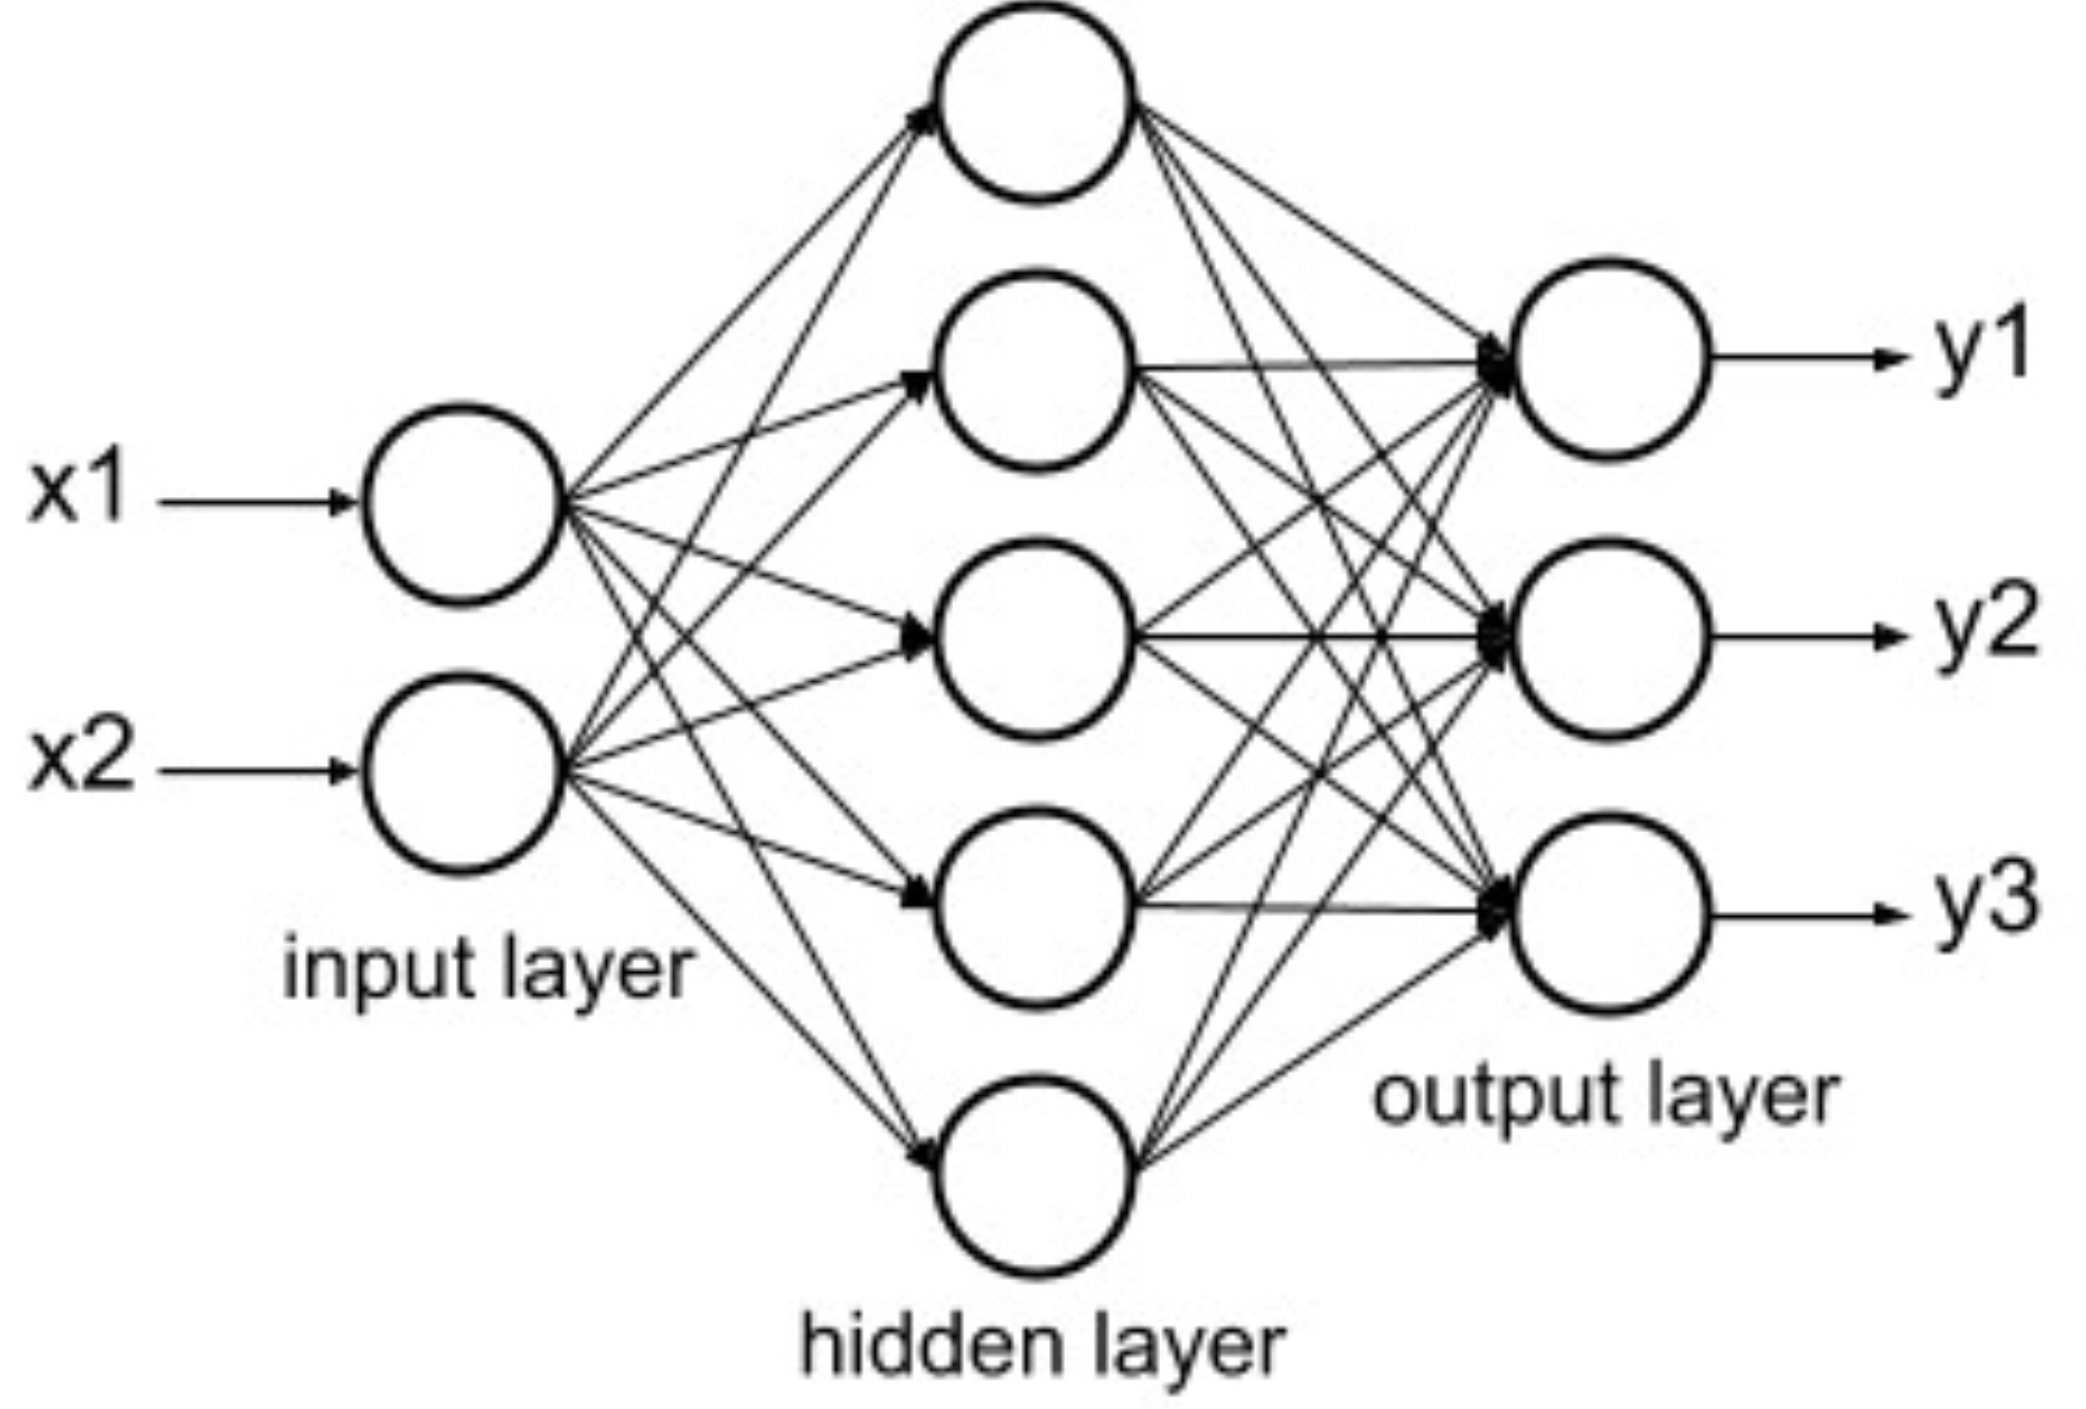# More Then Two Target Values
A nice benefit of an MLP classifier is that it easily extends to problems that have more than 2 target values. In the previous modules, we have dealt with predicting 0 or 1 (true or false, survived or not, cancerous or not, ). In some cases, we will be choosing among 3 or more possible outputs. A neural network does this naturally. We just need to add more nodes to the output layer. For example, if we are trying to predict if an image is a bird, cat or dog, we will have three output nodes. The first (y1) measures if the image is a bird, the second (y2) measures if the image is a cat, and the third (y3) measures if the image is a dog. The model chooses the output with the highest value.


# Loss
In order to train a neural network, we need to define a **loss function.** This is a measure of how far off our neural network is from being perfect. When we train the neural network, we are optimizing a loss function.

We will use **cross entropy** as our loss function. This is the same as the likelihood we used in logistic regression but is called by a different name in this context. We calculate the cross entropy as follows.

# Backpropagation
A neural network has a lot of parameters that we can control. There are several coefficients for each node and there can be a lot of nodes! The process for updating these values to converge on the best possible model is quite complicated. The neural network works backwards from the output node iteratively updating the coefficients of the nodes. This process of moving backwards through the neural network is called **backpropagation or backprop.**

We won't go through all the details here as it involves calculating partial derivatives, but the idea is that we initialize all the coefficient values and iteratively change the values so that at every iteration we see improvement in the loss function. Eventually we cannot improve the loss function anymore and then we have found our **optimal model.**

# Creating Artificial Dataset
Sometimes in order to test models, it is helpful to create an artificial dataset. We can create a dataset of the size and complexity needed. Thus we can make a dataset that is easier to work with than a real life dataset. This can help us understand how models work before we apply them to messy real world data.

We will use the make_classification function in scikit-learn. It generates a feature matrix X and target array y. We will give it these parameters:

• n_samples: number of datapoints
• n_features: number of features
• n_informative: number of informative features
• n_redundant: number of redundant features
• random_state: random state to guarantee same result every time

You can look at the full documentation to see other parameters that you can tweak to change the result.

Here is the code to generate a dataset.






In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=3)
print(X)
print(y)

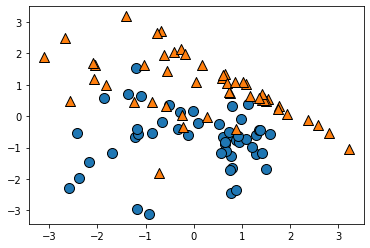

In [ ]:
# same as above with visualization

from sklearn.datasets import make_classification
from matplotlib import pyplot as plt

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=3)

plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=100, edgecolors='k')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], s=100, edgecolors='k', marker='^')
plt.show()

# MLPClassifier
Scikit-learn has an MLPClassifier class which is a multi-layer perceptron for classification. We can import the class from scikit-learn, create an MLPClassifier object and use the fit method to train.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# ConvergenceWarning
You will notice that we get a ConvergenceWarning. This means that the neural network needs more iterations to converge on the optimal coefficients. The default number of iterations is 200. Let’s up this value to 1000.

Now when we run this code, the neural network will converge. We can now use the score method to calculate the accuracy on the test set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)
print("accuracy:", mlp.score(X_test, y_test))

accuracy: 0.64


# Parameters for MLPClassifier
There are a couple of parameters that you may find yourself needing to change in the MLPClassifier.

You can configure the number of hidden layers and how many nodes in each layer. The default MLPClassifier will have a single hidden layer of 100 nodes. This often works really well, but we can experiment with differen
t values. This will create an MLPCLassifier with two hidden layers, one of 100 nodes and one of 50 nodes.


```
# mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100, 50))
```

We saw **max_iter** in the previous part. This is the number of iterations. In general, the more data you have, the fewer iterations you need to converge. If the value is too large, it will take too long to run the code. If the value is too small, the neural network will not converge on the optimal solution.

We also sometimes need to change **alpha**, which is the step size. This is how much the neural network changes the coefficients at each iteration. If the value is too small, you may never converge on the optimal solution. If the value is too large, you may miss the optimal solution. Initially you can leave this at the default. The default value of alpha is 0.0001. Note that decreasing alpha often requires an increase in **max_iter**.

Sometimes you will want to change the **solver**. This is what algorithm is used to find the optimal solution. All the solvers will work, but you may find for your dataset that a different solver finds the optimal solution faster. The options for solver are 'lbfgs', 'sgd' and 'adam'.

Run this code in the playground and try changing the parameters for the MLPClassifier. The code uses a random_state to ensure that every time you run the code with the same parameters you will get the same output.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100, 50), alpha=0.0001, solver='adam', random_state=3)
mlp.fit(X_train, y_train)
print("accuracy:", mlp.score(X_test, y_test))

accuracy: 0.76


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100, 50), alpha=0.0001, solver='adam', random_state=3)
mlp.fit(X_train, y_train)
print("accuracy:", mlp.score(X_test, y_test))

accuracy: 0.76


# The MNIST Dataset
In this lesson we will be working with a new dataset, the MNIST database of handwritten digits. NIST is the National Institute of Standards and Technology and the M stands for Modified.

This is a database of images of handwritten
digits. We will build a classifier to determine which digit is in the image.

We will start with the version of the MNIST dataset that is built into scikit-learn. This has the images with only 8 by 8 pixels, so they are blurry.

In scikit-learn we can load the dataset using the load_digits function. To simplify the problem, we will initially only be working with two digits (0 and 1), so we use the n_class parameter to limit the number of target values to 2.


```
from sklearn.datasets import load_digits
X, y = load_digits(n_class=2, return_X_y=True)
```

We can see the dimensions of X and y and what the values look like as follows.


```
print(X.shape, y.shape)
print(X[0])
print(y[0])
```
Output:



```
(360, 64) (360,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0
```

We see that we have 300 datapoints and each datapoint has 64 features. We have 64 features because the image is 8 x 8 pixels and we have 1 feature per pixel. The value is on a grayscale where 0 is black and 16 is white.

To get a more intuitive view of the datapoint, reshape the array to be 8x8.


```
print(X[0].reshape(8, 8))
```

Output:


```
[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
```

We can see that this is a 0, though we will see in the next part that we can draw the image more clearly.

In [ ]:
from sklearn.datasets import load_digits
X, y = load_digits(n_class=2, return_X_y=True)
print(X.shape, y.shape)
print(X[0])
print(y[0])
print(X[0].reshape(8, 8))

(360, 64) (360,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


# Drawing The Image
You can build a model without ever looking at a visual representation of the images, but it can sometimes be helpful to draw the image.

We use the matplotlib function **matshow** to draw the image. The cmap parameter is used to indicate that the image should be in a grayscale rather than colored.

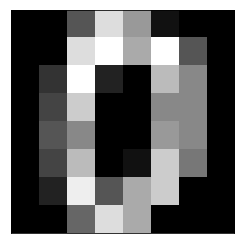

In [ ]:
# same as above except with visualization
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

X, y = load_digits(n_class=2, return_X_y=True)
plt.matshow(X[0].reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())  # remove x tick marks
plt.yticks(())  # remove y tick marks
plt.show()

# MLP for MNIST Dataset
Now let’s use the MLPClassifier to build a model for the MNIST dataset.

We will do a train/test split and train an MLPClassifier on the training set.


```
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
```
We do not get a warning, so the default number of iterations is adequate in this case.

Let’s look at how the model predicts the first datapoint in the test set. We use matplotlib to draw the images and then show the model’s prediction.


```
x = X_test[0]
plt.matshow(x.reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
print(mlp.predict([x]))
# 0
```

We can see that this is a 0 and that our model correctly predicts 0.

Similarly, let’s look at the second datapoint.



```
x = X_test[1]
plt.matshow(x.reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
print(mlp.predict([x]))
# 1
```



In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X, y = load_digits(n_class=2, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

print(mlp.score(X_test, y_test))

1.0


# Classifying all 10 Digits
Since neural networks easily generalize to handle multiple outputs, we can just use the same code to build a classifier to distinguish between all ten digits.

This time when we load the digits, we do not limit the number of classes.

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
mlp = MLPClassifier(random_state=2)
mlp.fit(X_train, y_train)

print(mlp.score(X_test, y_test))

0.96


So we got 96% of the datapoints in the test set correct. Let’s look at the ones we got incorrect. We use a numpy mask to pull out just the datapoints we got incorrect. We pull the x values, the true y value as well as the predicted value.


```
y_pred = mlp.predict(X_test)
incorrect = X_test[y_pred != y_test]
incorrect_true = y_test[y_pred != y_test]
incorrect_pred = y_pred[y_pred != y_test] 
```
Let’s look at the first image that we got wrong and what our prediction was.


```
j = 0
plt.matshow(incorrect[j].reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
print("true value:", incorrect_true[j])
print("predicted value:", incorrect_pred[j])
```




In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
mlp = MLPClassifier(random_state=2)
mlp.fit(X_train, y_train)

print(mlp.score(X_test, y_test))

y_pred = mlp.predict(X_test)
incorrect = X_test[y_pred != y_test]
incorrect_true = y_test[y_pred != y_test]
incorrect_pred = y_pred[y_pred != y_test]

j = 0
print(incorrect[j].reshape(8, 8).astype(int))
print("true value:", incorrect_true[j])
print("predicted value:", incorrect_pred[j])

0.96
[[ 0  0 11  7  0  0  0  0]
 [ 0  5 16  3  2 14  3  0]
 [ 0  9 15  0 12 15  0  0]
 [ 0  6 16 15 16  5  0  0]
 [ 0  0  6 15 11  0  0  0]
 [ 0  0  1 16  4  0  0  0]
 [ 0  0  9 12  0  0  0  0]
 [ 0  0 13 10  0  0  0  0]]
true value: 4
predicted value: 9


# Open ML
For this lesson, we will use a more granular version of the MNIST dataset. Instead of using the version in scikit-learn which has 64 pixel images, we will use a version from Open ML that has 784 pixels (28 x 28).

Open ML (www.openml.org) has a database of large datasets that can be used for a variety of machine learning problems. Scikit-learn has a function fetch_openml for directly downloading datasets from the Open ML database.

Use the following code to get our dataset.


```
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
```
We can briefly look at the shape of the arrays, the range of the features values, and the first few values of the target array to better understand the dataset.


```
print(X.shape, y.shape)
print(np.min(X), np.max(X))
print(y[0:5])
```
**OUTPUT:**


```
(70000, 784) (70000,)
0.0 255.0
['5' '0' '4' '1' '9']
```

We can see that we have 70,000 datapoints with 784 features. The feature values range from 0 to 255 (which we interpret on a gray scale with 0 being white and 255 being black). The target values are the numbers 0-9. Note that the target values are stored as strings and not integers.

For our example, we will be using only the digits 0-3, so we can use the following code to segment out that portion of the dataset.


```
X5 = X[y <= '3']
y5 = y[y <= '3']
```
We will be modifying some of the default parameters in the MLPClassifier to build the model. Since our goal will be to visualize the weights of the hidden layer, we will use only 6 nodes in the hidden layer so that we can look at all of them. We will use 'sgd' (stochastic gradient descent) as our solver which requires us to decrease alpha (the learning rate).


```
mlp=MLPClassifier(
  hidden_layer_sizes=(6,), 
  max_iter=200, alpha=1e-4,
  solver='sgd', random_state=2)

mlp.fit(X5, y5)
```






# MLPClassifier Coefficients
The MLPClassifier stores the coefficients in the coefs_ attribute. Let’s see what it looks like.


```
print(mlp.coefs_)
```
**OUTPUT:**


```
[array([[-0.01115571, -0.08262824, 0.00865588, -0.01127292, -0.01387942,
        -0.02957163],
...
```
First we see that it is a list with two elements.


```
print(len(mlp.coefs_))
```

**OUTPUT:**


```
2
```

The two elements in the list correspond to the two layers: the hidden layer and the output layer. We have an array of coefficients for each of these layers. Let’s look at the shape of the coefficients for the hidden layer.


```
print(mlp.coefs_[0].shape)
Output:
(784, 6)
```

We see that we have a 2-dimensional array of size 784 x 6. There are 6 nodes and 784 input values feeding into each node, and we have a weight for each of these connections.


# Visualizing the hidden layer
To get a better understanding of what the neural network is doing, we can visualize the weights of the hidden layer to get some insight into what each node is doing.

We will use the matshow function from matplotlib again to draw the images. In matplotlib we can use the subplots function to create multiple plots within a single plot.


```
fig, axes = plt.subplots(2, 3, figsize=(5, 4))
for i, ax in enumerate(axes.ravel()):
    coef = mlp.coefs_[0][:, i]
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(i + 1)
plt.show()
```
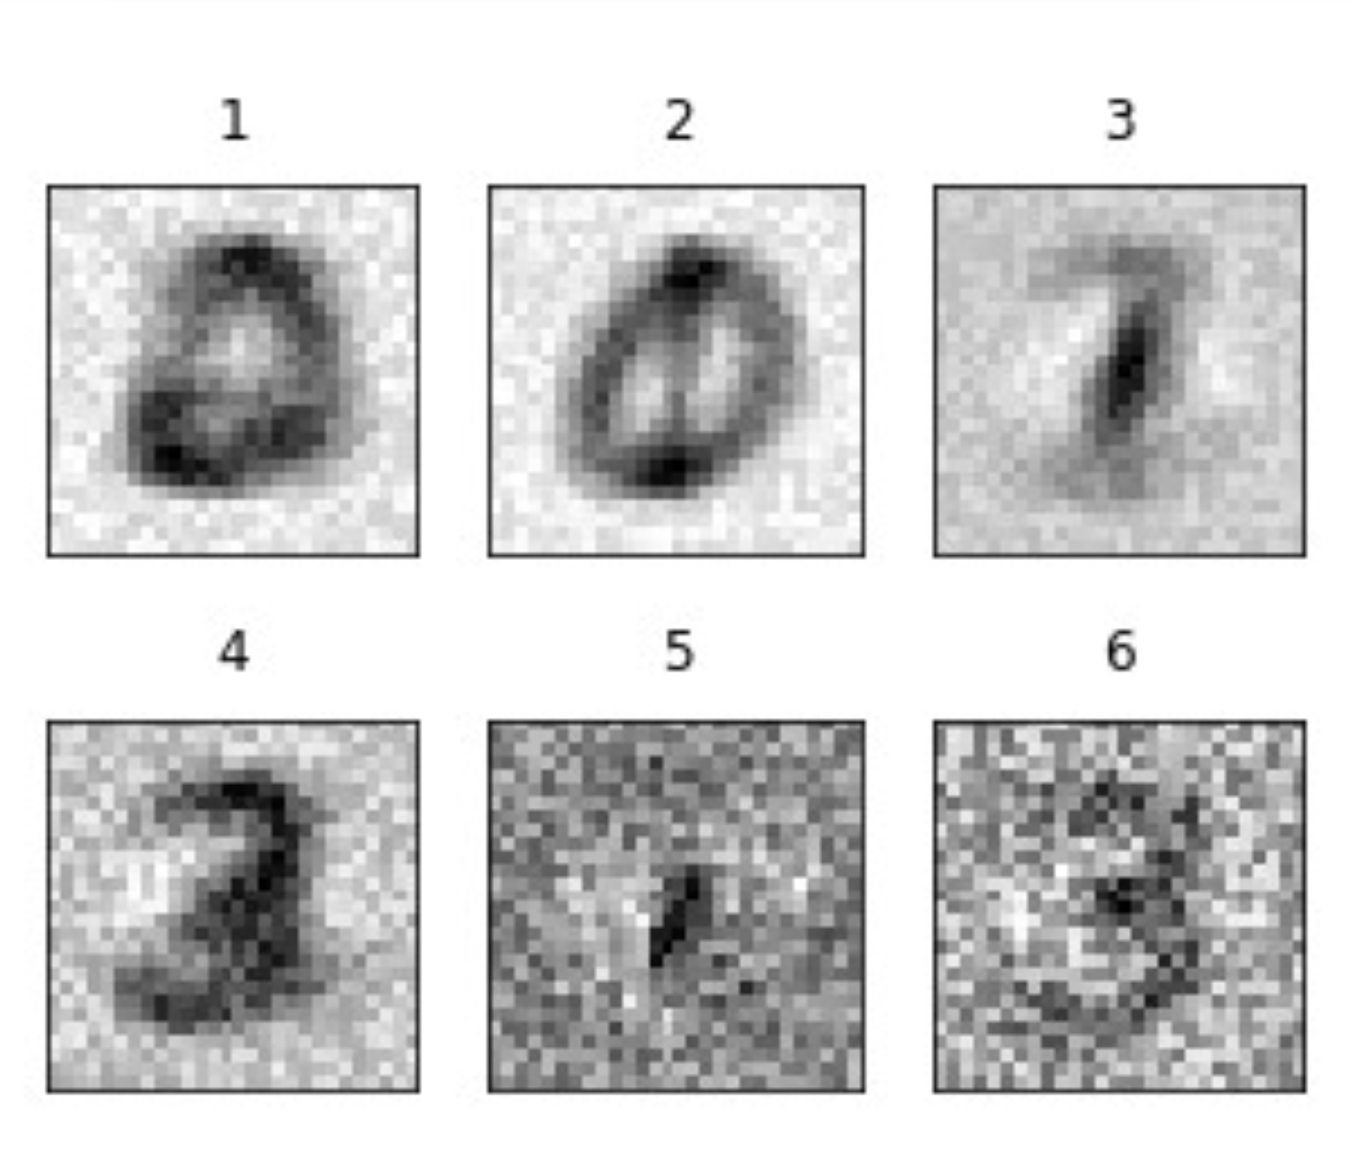

